In [1]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
print(os.getcwd())



C:\Users\lyhci\Downloads\itcs3156


In [10]:
file_path = 'C:/Users/lyhci/Downloads/itcs3156/ratings.dat'
ratings = pd.read_csv(file_path, delimiter='::', engine='python', names=column_names)


In [14]:
import pandas as pd

file_path = r'C:\Users\lyhci\Downloads\itcs3156\ratings.dat'

column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']

ratings = pd.read_csv(file_path, delimiter='::', engine='python', names=column_names)

print(ratings.head())



   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


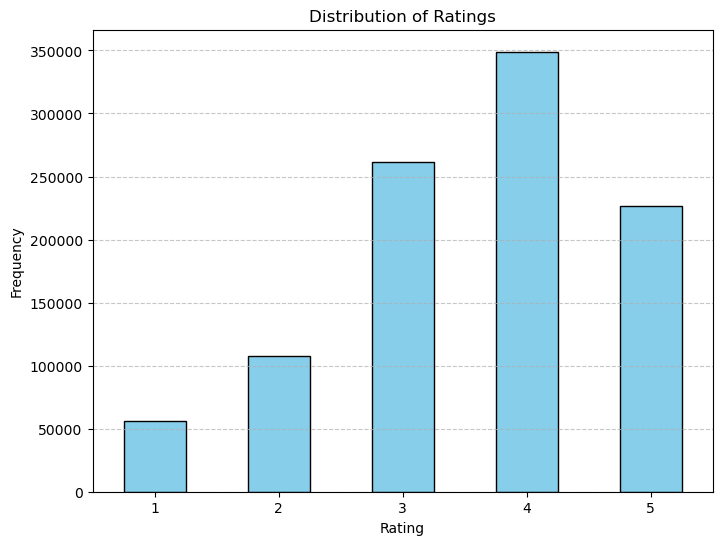

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\lyhci\Downloads\itcs3156\ratings.dat'

column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']

ratings = pd.read_csv(file_path, delimiter='::', engine='python', names=column_names)

print(ratings.head())

plt.figure(figsize=(8, 6))
ratings['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


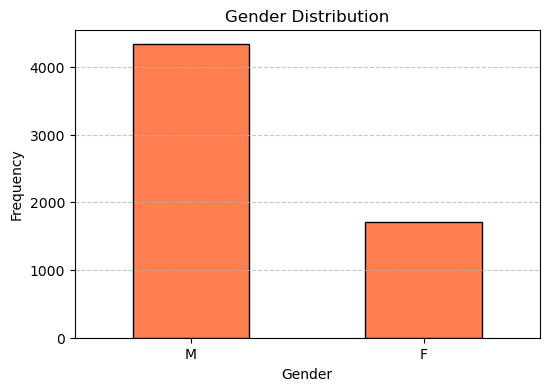

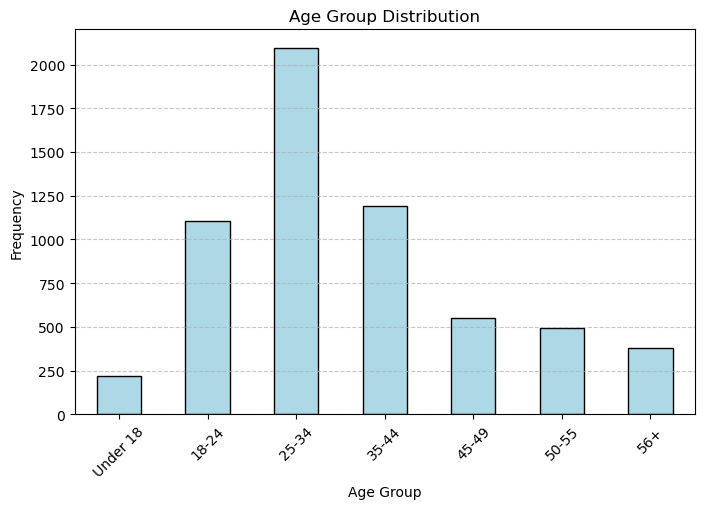

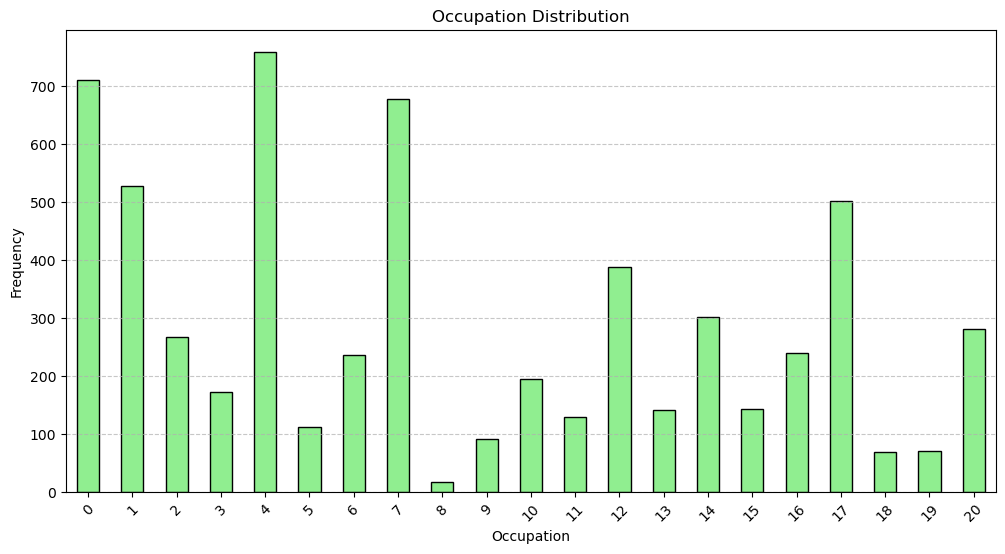

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

users_file_path = r'C:\Users\lyhci\Downloads\itcs3156\users.dat'

user_columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

users = pd.read_csv(users_file_path, delimiter='::', engine='python', names=user_columns)

print(users.head())

plt.figure(figsize=(6, 4))
users['Gender'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 5))
users['Age'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(users['Age'].unique())), labels=[
    "Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
users['Occupation'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


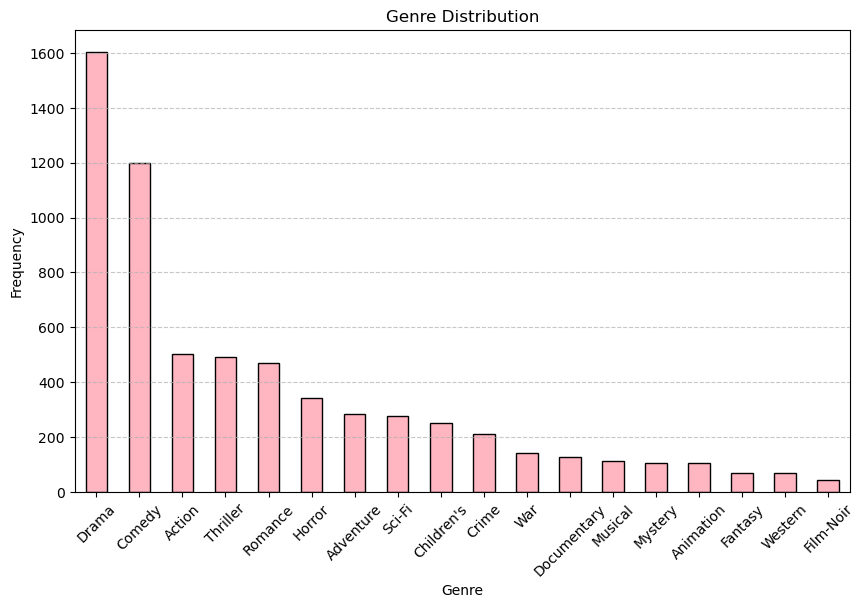

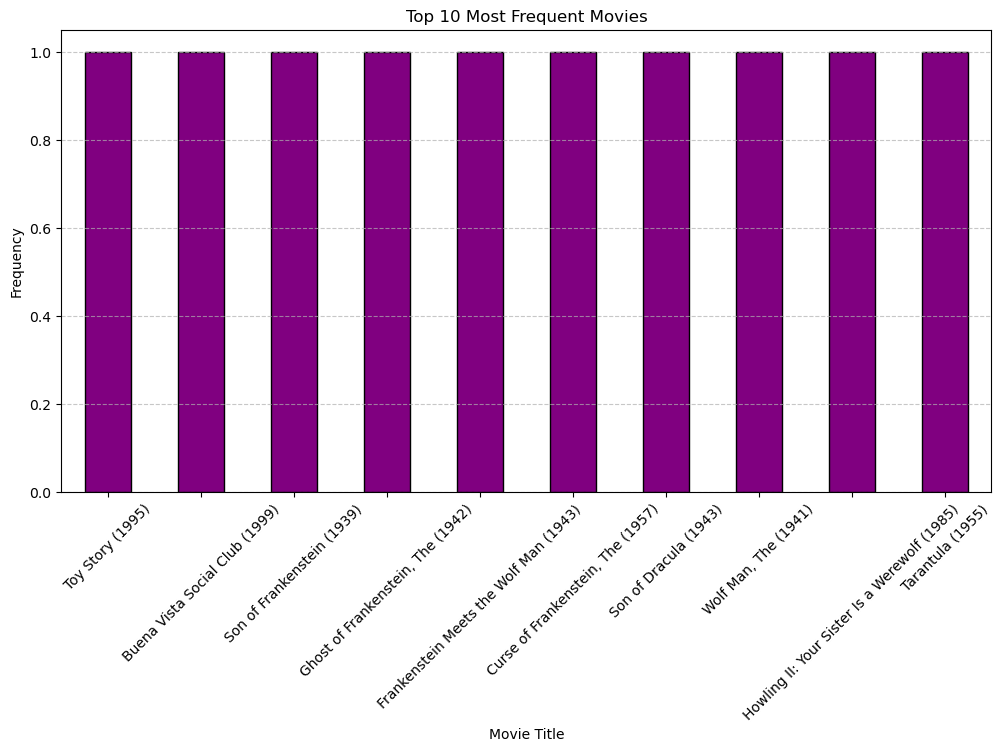

In [18]:
movies_file_path = r'C:\Users\lyhci\Downloads\itcs3156\movies.dat'

movie_columns = ['MovieID', 'Title', 'Genres']

movies = pd.read_csv(movies_file_path, delimiter='::', engine='python', names=movie_columns, encoding='latin1')

print(movies.head())


movies['Genres'] = movies['Genres'].str.split('|')
all_genres = [genre for sublist in movies['Genres'] for genre in sublist]

plt.figure(figsize=(10, 6))
pd.Series(all_genres).value_counts().plot(kind='bar', color='lightpink', edgecolor='black')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
movies['Title'].value_counts().head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Frequent Movies')
plt.xlabel('Movie Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [37]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

movies_file_path = r'C:\Users\lyhci\Downloads\itcs3156\movies.dat'
movie_columns = ['MovieID', 'Title', 'Genres']

movies = pd.read_csv(movies_file_path, delimiter='::', engine='python', names=movie_columns, encoding='latin1')

movies['Processed_Genres'] = movies['Genres'].str.replace('|', ' ')

count_vectorizer = CountVectorizer()
genre_matrix = count_vectorizer.fit_transform(movies['Processed_Genres'])

cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

# Recommendation Function
def recommend_movies(movie_title, movies, cosine_sim, top_n=5):
    try:
        movie_idx = movies[movies['Title'] == movie_title].index[0]
    except IndexError:
        return [f"'{movie_title}' not found in the dataset."]
    
    sim_scores = list(enumerate(cosine_sim[movie_idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    top_movies = sim_scores[1:top_n+1]
    
    recommended_titles = [movies.iloc[i[0]]['Title'] for i in top_movies]
    
    return recommended_titles

movie_title = "Jumanji (1995)"
recommendations = recommend_movies(movie_title, movies, cosine_sim, top_n=5)

print(f"Movies similar to '{movie_title}':")
for idx, title in enumerate(recommendations, start=1):
    print(f"{idx}. {title}")



Movies similar to 'Jumanji (1995)':
1. Kids of the Round Table (1995)
2. Indian in the Cupboard, The (1995)
3. NeverEnding Story III, The (1994)
4. Escape to Witch Mountain (1975)
5. Labyrinth (1986)


In [33]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import numpy as np

ratings_file_path = r'C:\Users\lyhci\Downloads\itcs3156\ratings.dat'
movies_file_path = r'C:\Users\lyhci\Downloads\itcs3156\movies.dat'

ratings_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
movies_columns = ['MovieID', 'Title', 'Genres']

ratings = pd.read_csv(ratings_file_path, delimiter='::', engine='python', names=ratings_columns, encoding='latin1')
movies = pd.read_csv(movies_file_path, delimiter='::', engine='python', names=movies_columns, encoding='latin1')

user_item_matrix = ratings.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)

n_components = 50  
svd = TruncatedSVD(n_components=n_components, random_state=42)
user_factors = svd.fit_transform(user_item_matrix)
item_factors = svd.components_

predicted_ratings = np.dot(user_factors, item_factors)

def recommend_movies(user_id, user_item_matrix, predicted_ratings, movies, top_n=5):
    user_rated_movie_ids = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()
    
    user_predicted_ratings = predicted_ratings[user_id - 1]
    
    recommendations = [(movie_id, score) for movie_id, score in enumerate(user_predicted_ratings, start=1) if movie_id not in user_rated_movie_ids]
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]
    
    recommended_titles = [movies[movies['MovieID'] == movie_id]['Title'].values[0] for movie_id, _ in recommendations]
    
    return recommended_titles

user_id = 2  
recommendations = recommend_movies(user_id, user_item_matrix, predicted_ratings, movies, top_n=5)

print(f"Recommendations for User {user_id}:")
for idx, title in enumerate(recommendations, start=1):
    print(f"{idx}. {title}")


Recommendations for User 2:
1. Muppet Treasure Island (1996)
2. Live Nude Girls (1995)
3. Rent-a-Kid (1995)
4. Children of the Corn IV: The Gathering (1996)
5. Fausto (1993)
